In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
import seaborn as sn

In [175]:
# modification du code du TP précédent

def modele_minority(Ns, Np = 150):

    M = 4
    P = 2**M
    e = 1/100

    a = np.random.choice([-1,1], size = (Ns,P))
    omega = np.random.normal(0, np.sqrt(Np), size = (P,))
    U = np.zeros((Ns,))

    T = np.linspace(0, 1, int(200*P/e))
    mu = [0.]*len(T)
    A_tot = [0.]*len(T)
    A_spec = [0.]*len(T)
    gain_prod = [0.]*len(T)
    gain_spec = [0.]*len(T)

    mu[0] = np.random.randint(P) % P

    for t in range(len(T)-1):
        n = U > 0
        A_spec[t] = np.dot(n.T, a[:,mu[t]])
        A_tot[t] = omega[mu[t]] + A_spec[t]
        U = U - e - A[t]*a[:,mu[t]]
        mu[t+1] = 2*mu[t] % P + (A[t]>0)
        gain_prod[t] = -omega[mu[t]]*A[t]
        gain_spec[t] = -A[t]*A_spec[t]
        
    return a, U, A_tot, A_spec, mu, T, gain_prod, gain_spec

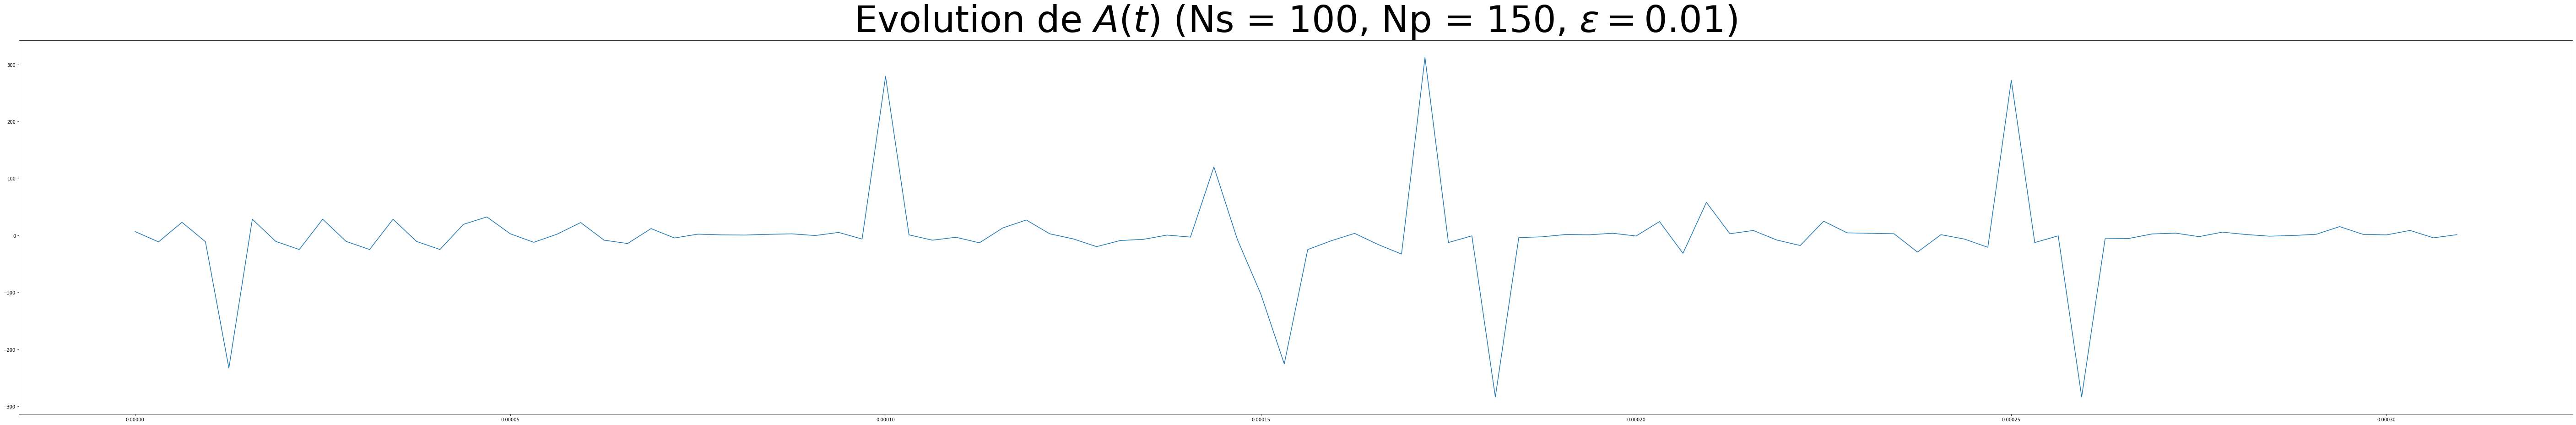

In [176]:
a, U, A_tot, A_spec, mu, T, gain_prod, gain_spec = modele_minority(100)
plt.figure(figsize=(100,15))
plt.plot(T[:100],A[:100])
plt.title(f"Evolution de $A(t)$ (Ns = 100, Np = 150, $\epsilon = {e}$)",fontsize=80)
plt.show()

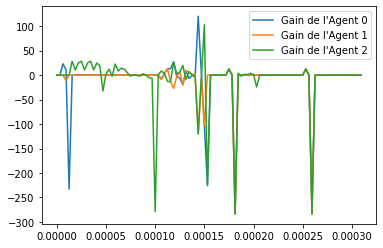

In [177]:
# Profil du gain pour 3 agents au 100 premiers pas de temps
for i in range(3):
    plt.plot(T[:100], g[i][:100], label = f"Gain de l'Agent {i}")
plt.legend()
plt.show()

Les gains sont assez inégaux d'un agent à l'autre. Commentaire.

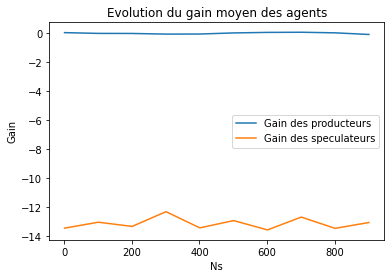

In [178]:
N = range(1, 1000, 100)
G_prod = np.zeros(len(N))
G_spec = np.zeros(len(N))

for i in range(len(N)):
    a, U, A_tot, A_spec, mu, T, gain_prod, gain_spec = modele_minority(n)
    G_prod[i] = np.mean(gain_prod)
    G_spec[i] = np.mean(gain_spec)

plt.plot(N, G_prod, label = "Gain des producteurs")
plt.plot(N, G_spec, label = "Gain des speculateurs")
plt.title("Evolution du gain moyen des agents")
plt.ylabel("Gain")
plt.xlabel("Ns")
plt.legend()
plt.show()

Commentaire

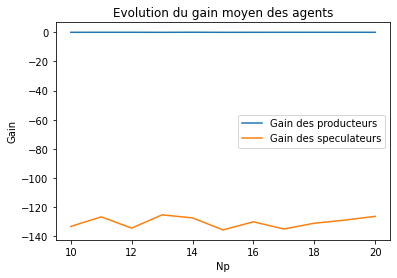

In [173]:
# sur le graphe Ns = 600
N = range(10, 21, 1)
G_prod = np.zeros(len(N))
G_spec = np.zeros(len(N))

for i in range(len(N)):
    a, U, A_tot, A_spec, mu, T, gain_prod, gain_spec = modele_minority(600, Np=N[i])
    G_prod[i] = np.mean(gain_prod)
    G_spec[i] = np.mean(gain_spec)

plt.plot(N, G_prod, label = "Gain des producteurs")
plt.plot(N, G_spec, label = "Gain des speculateurs")
plt.title("Evolution du gain moyen des agents")
plt.ylabel("Gain")
plt.xlabel("Np")
plt.legend()
plt.show()

Producteurs = proies </br> Spéculateurs = prédateurs